#### AOS 575 - 2d Eigenanalysis example - Lecture 10/8/2020
coded by Vineel Yettella (University of Colorado), Last updated February 15, 2019 <br>
Updated for AOS 575 by Prof. Maroon (UWisc) <br>
Last updated 10/6/2020

In [1]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy.linalg as LA

#### 1) Create a synthetic 2d dataset, plot it, and print some summary statistics.

In [2]:
## Create the synthetic 2d dataset
#Choose the number of samples M
M = 50

variance_x1 = 4
variance_x2 = 1
mean_x1 = 3
mean_x2 = 10

#specified correlation between -1 and 1 to construct a valid covariance matrix
rho12 = 0.8

In [3]:
#create the population covariance matrix
covariance_matrix = [[variance_x1, rho12*np.sqrt(variance_x1*variance_x2)], [rho12*np.sqrt(variance_x1*variance_x2), variance_x2]]
covariance_matrix = np.around(covariance_matrix, decimals=3)

means = [mean_x1, mean_x2]
means = np.around(means, decimals=3)

#show the covraince matrix
print(covariance_matrix)




[[4.  1.6]
 [1.6 1. ]]


x1:
[ 3.04229996  3.04491089  5.72170055  4.039006   -0.60702289]


x2:
[10.56182124 10.30994753 10.42671596  9.64438519  8.69969788]


Sample mean of x1: 3.4507021104425672
Sample mean of x2: 10.163959106083151
Sample variance of x1: 2.9224058043986445
Sample variance of x2: 0.9880950981603293
Total variance in the data: 3.9105009025589736


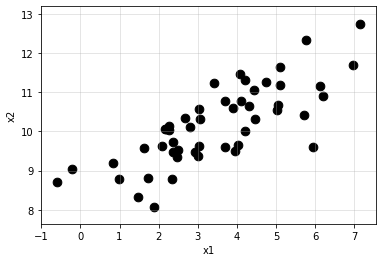

In [4]:
#simulate
x1, x2 = np.random.multivariate_normal(means, covariance_matrix, M).T    
#the above numpy function creates 2 random normal samples of length M that have the covariance properties in the supplied covariance matrix

#print a few values
print ('x1:')
print(x1[0:5])
print('\n')
print('x2:')
print(x2[0:5])

#print some summary statistics
print('\n')
print("Sample mean of x1: {}".format(np.mean(x1)))
print("Sample mean of x2: {}".format(np.mean(x2)))
print("Sample variance of x1: {}".format(np.var(x1)))
print("Sample variance of x2: {}".format(np.var(x2)))
print("Total variance in the data: {}".format(np.var(x1) + np.var(x2)))
#THese numbers should be similar to the statistics we set above, but not quite the same because our samples are small

#plot x1, x2
plt.scatter(x1, x2, s=75, color = 'black')
plt.axis('equal')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(alpha = 0.4)
plt.rcParams['axes.labelsize']=15


### 2) Calculate the eigenvectors and eigenvalues of the synthetic 2d dataset.

In [6]:
##Do the eigenanalysis; a few data cleanup and construction steps first.

#construct data matrix X, convention: variables across columns and observations across rows
X = np.array([x1, x2]).T
print('Data matrix X shape:')
print(X.shape)

#remove mean from each column
X = X - np.mean(X, axis = 0)

#construct sample covariance matrix C
C  = (1/(M - 1))*np.dot(X.T, X)
#Alternatively, you could use numpy's cov function



Data matrix X shape:
(50, 2)


In [7]:
#compute eigenvectors and eigenvalues
eigenvals, eigenvecs = LA.eig(C)    #function that does the eigenanalysis of matrix C

#sort eigen values in descending order
inds = np.argsort(eigenvals)
eigenvals = eigenvals[inds[::-1]]
#sort eigen vectors accordingly
eigenvecs = eigenvecs[:, inds[::-1]]

print('\n')
print('eigenvalues:')
print(eigenvals)
print('\n')
print('eigenvectors:')
print(eigenvecs)

print('\n')
print('Sum of eigenvalues:')
print(np.sum(eigenvals))

print('Total variance in the data')
print(np.sum(np.diag(C)))



eigenvalues:
[3.66448113 0.32582591]


eigenvectors:
[[ 0.8919619  -0.45211058]
 [ 0.45211058  0.8919619 ]]


Sum of eigenvalues:
3.990307043427524
Total variance in the data
3.9903070434275234


### 3) Plot the eigenvectors to show how they capture the orthogonal directions along which most of the variability in the dataset is explained.

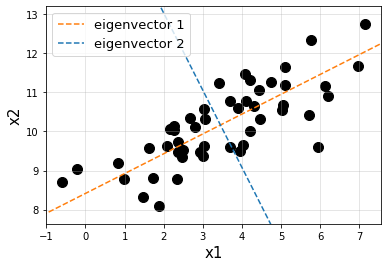

In [8]:
#plot eigen vectors
fig, ax = plt.subplots()
plt.scatter(x1, x2, s=100, color = 'black')
plt.axis('equal')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(alpha = 0.4)
ylim = plt.ylim()
xlim = plt.xlim()
#plot eigen vector 1
plt.plot([-100*eigenvecs[0,0] + np.mean(x1), 100*eigenvecs[0,0] + np.mean(x1)],
         [-100*eigenvecs[1,0] + np.mean(x2), 100*eigenvecs[1,0] + np.mean(x2)], 
         linestyle = '--',color = 'C1', label = 'eigenvector 1')
#plot eigen vector 2
plt.plot([-100*eigenvecs[0,1] + np.mean(x1), 100*eigenvecs[0,1] + np.mean(x1)],
         [-100*eigenvecs[1,1] + np.mean(x2), 100*eigenvecs[1,1] + np.mean(x2)], 
         linestyle = '--',color = 'C0', label = 'eigenvector 2')
plt.ylim(ylim);
plt.xlim(xlim);
plt.legend(fontsize = 13);